In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/kaggle/input/crimes-2001-to-present/Crimes_-_2001_to_Present.csv")

In [3]:
df.shape

(7784664, 22)

In [8]:
import seaborn as sns

<Axes: >

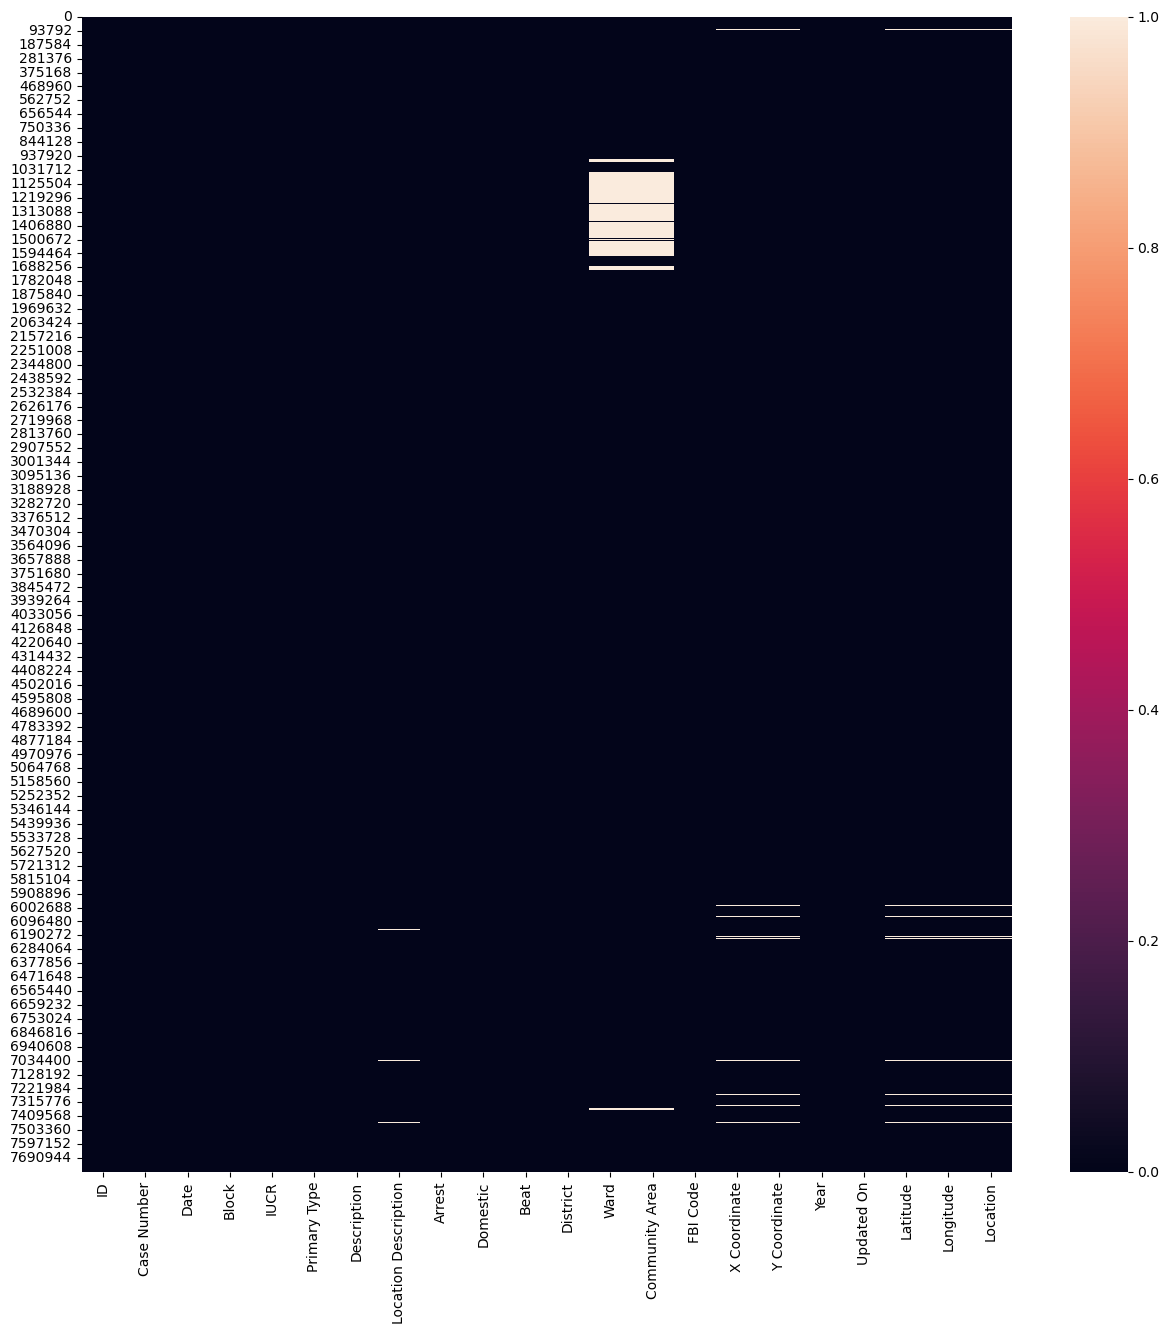

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(df.isnull())

In [20]:
df  = df.drop(['Latitude','Longitude','Updated On','Year','Y Coordinate','X Coordinate','Ward','District','IUCR','Case Number','FBI Code','Location','Community Area','Beat'],axis = 1)

In [21]:
df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10224738,09/05/2015 01:30:00 PM,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
1,10224739,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False
2,11646166,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True
3,10224740,09/05/2015 12:45:00 PM,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False
4,10224741,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True
...,...,...,...,...,...,...,...,...
7784659,12847575,09/01/2022 05:00:00 AM,005XX W SURF ST,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
7784660,12847801,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False
7784661,12847324,09/27/2022 11:00:00 AM,023XX E 70TH ST,THEFT,OVER $500,RESIDENCE,False,False
7784662,12847570,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False


In [22]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [34]:
order1 = df['Primary Type'].value_counts().iloc[:15].index

<Axes: xlabel='count', ylabel='Primary Type'>

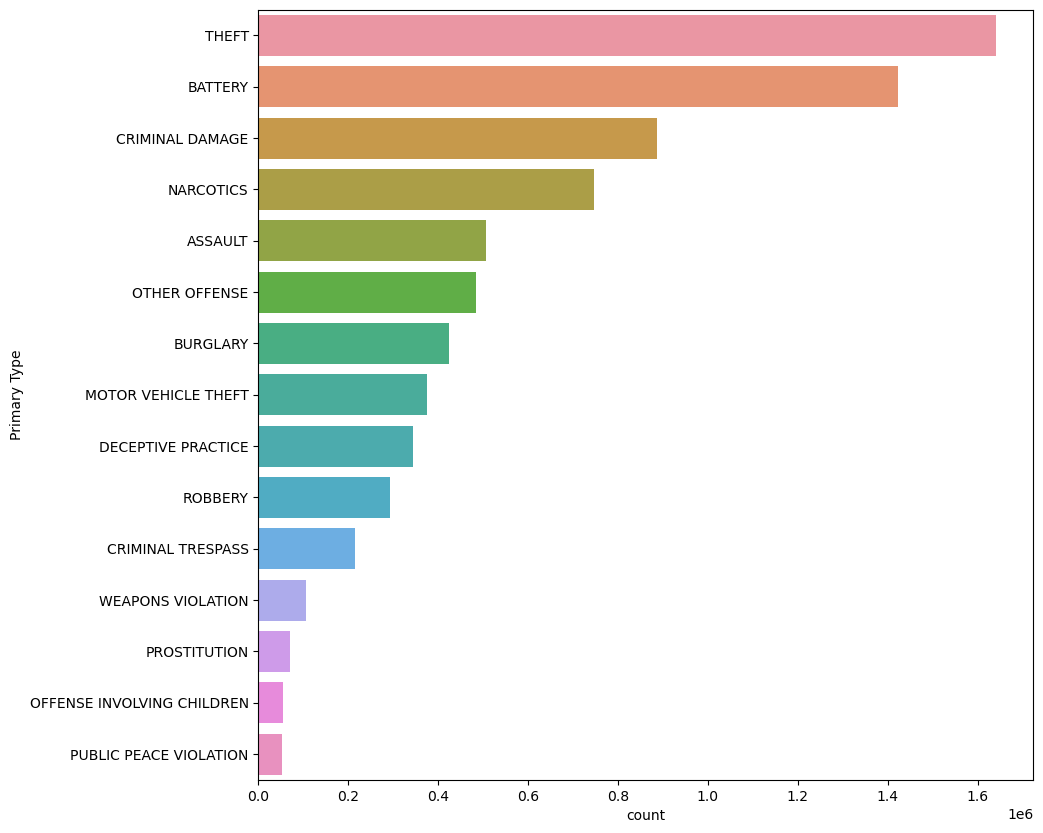

In [35]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Primary Type',data = df,order = order1 )

<Axes: xlabel='count', ylabel='Location Description'>

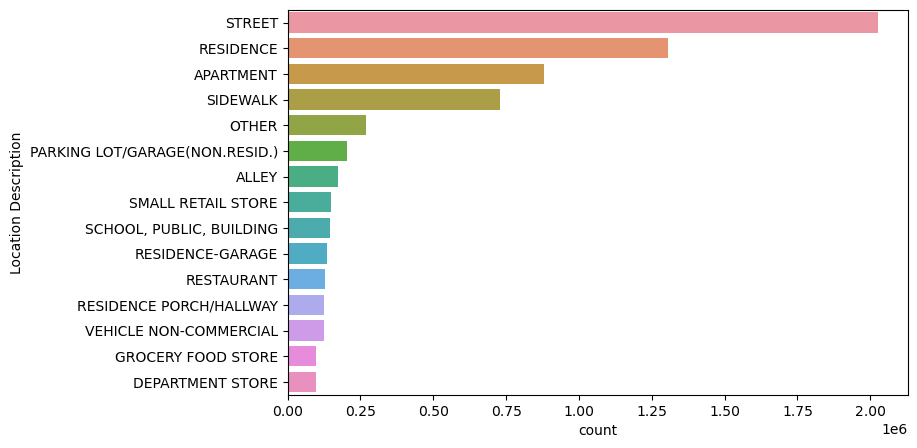

In [37]:
plt.figure(figsize = (8,5))
sns.countplot(y = 'Location Description',data  = df,order = (df['Location Description'].value_counts().iloc[:15].index))

In [39]:
df.index = pd.DatetimeIndex(df.Date)

In [42]:
df.resample('Y').size()

Date
2001-12-31    485878
2002-12-31    486802
2003-12-31    475979
2004-12-31    469421
2005-12-31    453771
2006-12-31    448174
2007-12-31    437084
2008-12-31    427167
2009-12-31    392819
2010-12-31    370496
2011-12-31    351964
2012-12-31    336262
2013-12-31    307468
2014-12-31    275731
2015-12-31    264755
2016-12-31    269786
2017-12-31    269071
2018-12-31    268773
2019-12-31    261245
2020-12-31    212092
2021-12-31    208571
2022-12-31    238215
2023-12-31     73140
Freq: A-DEC, dtype: int64

Text(0.5, 1.0, 'Crime Count over Years')

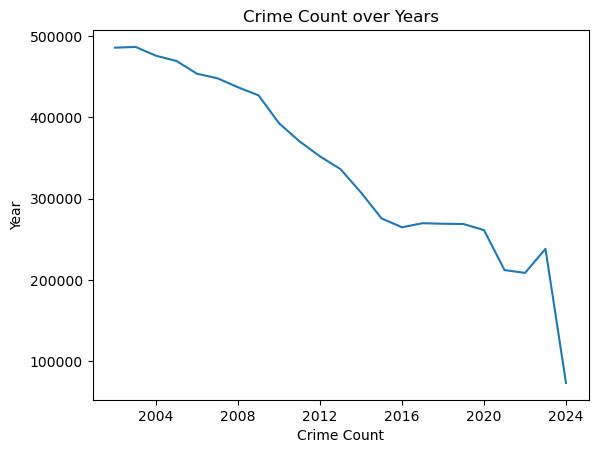

In [46]:
plt.plot((df.resample('Y').size()))
plt.xlabel('Crime Count')
plt.ylabel('Year')
plt.title('Crime Count over Years')

In [66]:
chicago_prophet = df.resample('W').size().reset_index()

In [67]:
chicago_prophet.columns = ['Date','Crime Count']

In [68]:
chicago_prophet_final_df = chicago_prophet.rename(columns = {'Date':'ds','Crime Count':'y'})

In [69]:
chicago_prophet_final_df

,ds,y
0,2001-01-07,8950
1,2001-01-14,8589
2,2001-01-21,8704
3,2001-01-28,8301
4,2001-02-04,8479
...,...,...
1159,2023-03-26,4706
1160,2023-04-02,4760
1161,2023-04-09,4577
1162,2023-04-16,4881


In [70]:
from prophet import Prophet

In [71]:
m = Prophet()
m.fit(chicago_prophet_final_df)

10:04:53 - cmdstanpy - INFO - Chain [1] start processing
10:04:53 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future = m.make_future_dataframe(periods =720 )

In [73]:
forecast = m.predict(future)

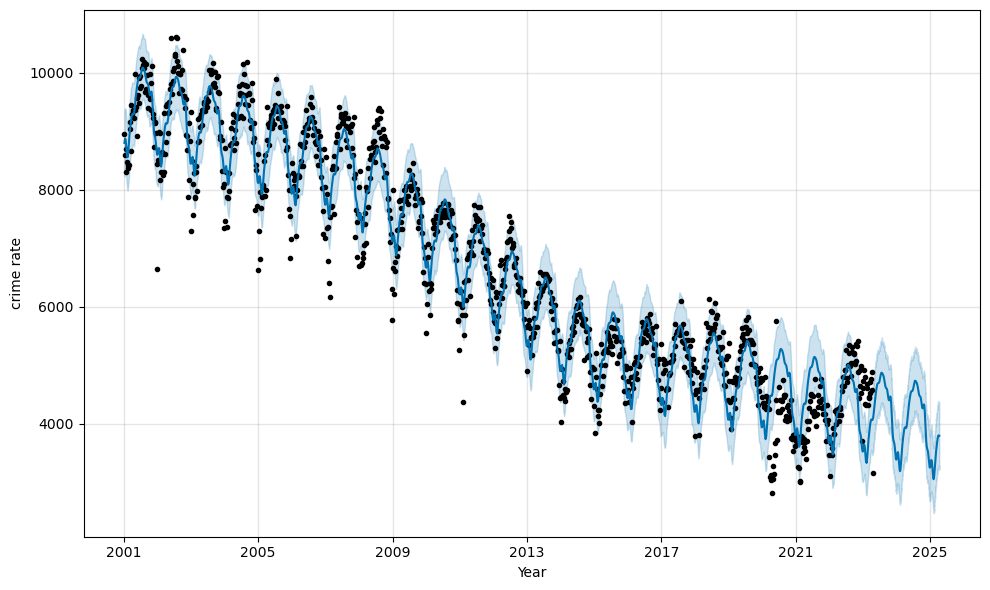

In [74]:
figure = m.plot(forecast,xlabel = 'Year',ylabel = 'crime rate')

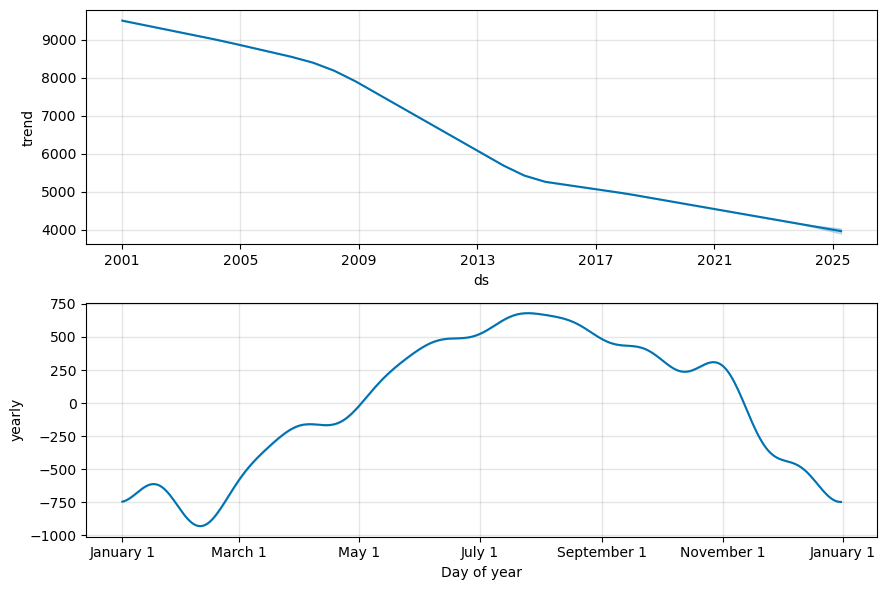

In [75]:
figure  = m.plot_components(forecast)